In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
pd.set_option('display.max_columns', None)

In [2]:
tf. __version__

'2.16.1'

In [3]:
df = pd.read_csv('data.csv')
df

Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1                       1   
2                                1                       1   
3                                1                       1   
4                                0                       1   
...                            ...                     ...   
4419                             1                       1   
4420                             1                       1   
4421                             1                       1   
4422                             1                       1   
4423                             1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
0                              122.0            1                      19   
1                              160.0            1                       1   
2                              122.0            1                      37   
3                              122.0            1                      38   
4                              100.0            1                      37   
...                              ...          ...                     ...   
4419                           125.0            1                       1   
4420                           120.0          105                       1   
4421                           154.0            1                      37   
4422                           180.0            1                      37   
4423                           152.0           22                      38   

      Father's qualification  Mother's occupation  Father's occupation  \
0                         12                    5                    9   
1                          3                    3                    3   
2                         37                    9                    9   
3                         37                    5                    3   
4                         38                    9                    9   
...                      ...                  ...                  ...   
4419                       1                    5                    4   
4420                       1                    9                    9   
4421                      37                    9                    9   
4422                      37                    7                    4   
4423                      37                    5                    9   

      Admission grade  Displaced  Educational special needs  Debtor  \
0               127.3          1                          0       0   
1               142.5          1                          0       0   
2               124.8          1                          0       0   
3               119.6          1                          0       0   
4               141.5          0                          0       0   
...               ...        ...                        ...     ...   
4419            122.2          0                          0       0   
4420            119.0          1                  

In [4]:
df = df.rename(columns={'Daytime/evening attendance\t': 'Daytime/evening attendance'})
df

Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance  Previous qualification  \
0                              1                       1   
1                              1                       1   
2                              1                       1   
3                              1                       1   
4                              0                       1   
...                          ...                     ...   
4419                           1                       1   
4420                           1                       1   
4421                           1                       1   
4422                           1                       1   
4423                           1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
0                              122.0            1                      19   
1                              160.0            1                       1   
2                              122.0            1                      37   
3                              122.0            1                      38   
4                              100.0            1                      37   
...                              ...          ...                     ...   
4419                           125.0            1                       1   
4420                           120.0          105                       1   
4421                           154.0            1                      37   
4422                           180.0            1                      37   
4423                           152.0           22                      38   

      Father's qualification  Mother's occupation  Father's occupation  \
0                         12                    5                    9   
1                          3                    3                    3   
2                         37                    9                    9   
3                         37                    5                    3   
4                         38                    9                    9   
...                      ...                  ...                  ...   
4419                       1                    5                    4   
4420                       1                    9                    9   
4421                      37                    9                    9   
4422                      37                    7                    4   
4423                      37                    5                    9   

      Admission grade  Displaced  Educational special needs  Debtor  \
0               127.3          1                          0       0   
1               142.5          1                          0       0   
2               124.8          1                          0       0   
3               119.6          1                          0       0   
4               141.5          0                          0       0   
...               ...        ...                        ...     ...   
4419            122.2          0                          0       0   
4420            119.0          1                          0       1   
442

In [5]:
df.shape

(4424, 37)

In [6]:
df.describe().T

count         mean  \
Marital status                                  4424.0     1.178571   
Application mode                                4424.0    18.669078   
Application order                               4424.0     1.727848   
Course                                          4424.0  8856.642631   
Daytime/evening attendance                      4424.0     0.890823   
Previous qualification                          4424.0     4.577758   
Previous qualification (grade)                  4424.0   132.613314   
Nacionality                                     4424.0     1.873192   
Mother's qualification                          4424.0    19.561935   
Father's qualification                          4424.0    22.275316   
Mother's occupation                             4424.0    10.960895   
Father's occupation                             4424.0    11.032324   
Admission grade                                 4424.0   126.978119   
Displaced                                       4424.0     0.548373   
Educational special needs                       4424.0     0.011528   
Debtor                                          4424.0     0.113698   
Tuition fees up to date                         4424.0     0.880651   
Gender                                          4424.0     0.351718   
Scholarship holder                              4424.0     0.248418   
Age at enrollment                               4424.0    23.265145   
International                                   4424.0     0.024864   
Curricular units 1st sem (credited)             4424.0     0.709991   
Curricular units 1st sem (enrolled)             4424.0     6.270570   
Curricular units 1st sem (evaluations)          4424.0     8.299051   
Curricular units 1st sem (approved)             4424.0     4.706600   
Curricular units 1st sem (grade)                4424.0    10.640822   
Curricular units 1st sem (without evaluations)  4424.0     0.137658   
Curricular units 2nd sem (credited)             4424.0     0.541817   
Curricular units 2nd sem (enrolled)             4424.0     6.232143   
Curricular units 2nd sem (evaluations)          4424.0     8.063291   
Curricular units 2nd sem (approved)             4424.0     4.435805   
Curricular units 2nd sem (grade)                4424.0    10.230206   
Curricular units 2nd sem (without evaluations)  4424.0     0.150316   
Unemployment rate                               4424.0    11.566139   
Inflation rate                                  4424.0     1.228029   
GDP                                             4424.0     0.001969   

                                                        std    min      25%  \
Marital status                                     0.605747   1.00     1.00   
Application mode                                  17.484682   1.00     1.00   
Application order                                  1.313793   0.00     1.00   
Course                                          2063.566416  33.00  9085.00   
Daytime/evening attendance                         0.311897   0.00     1.00   
Previous qualification                            10.216592   1.00     1.00   
Previous qualification (grade)                    13.188332  95.00   125.00   
Nacionality                                        6.914514   1.00     1.00   
Mother's qualification                            15.603186   1.00     2.00   
Father's qualification                            15.343108   1.00     3.00   
Mother's occupation                               26.418253   0.00     4.00   
Father's occupation                               25.263040   0.00     4.00   
Admission grade                                   14.482001  95.00   117.90   
Displaced                                          0.497711   0.00     0.00   
Educational special needs                          0.106760   0.00     0.00   
Debtor                                             0.317480   0.00     0.00   
Tuition fees up to date                            0.324235   0.00     1.00   

In [7]:
df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

In [8]:
X = df.drop(labels=['Target'], axis=1)
y = df['Target']

In [9]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([0, 2, 0, ..., 0, 2, 2])

In [10]:
label_encoder.classes_

array(['Dropout', 'Enrolled', 'Graduate'], dtype=object)

In [12]:
# numeric_columns = ['Unemployment rate', 'Inflation rate', 'GDP', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)']
one_hot_columns = ['Marital status', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Application mode', 'Course', 'Previous qualification']
# numeric_columns = [33, 34, 35, 25, 31, 19, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32]
# one_hot_columns = [0, 7, 8, 9, 10, 11, 1, 3, 5]

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot_1st', OneHotEncoder(), one_hot_columns)
    ],
    remainder='passthrough'
)

pipeline_X1 = Pipeline(steps=[('preprocessor', preprocessor)])

# pipeline_X1.fit(X)

# pipeline_cols = pipeline_X1.get_feature_names_out().tolist()
# remainder_cols = ['Application order', 'Daytime/evening attendance', 'Previous qualification (grade)', 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
# all_cols = pipeline_cols.append(remainder_cols)
X_encoded = pd.DataFrame(pipeline_X1.fit_transform(X).toarray(), columns=pipeline_X1.get_feature_names_out().tolist())

X_encoded

onehot_1st__Marital status_1  onehot_1st__Marital status_2  \
0                              1.0                           0.0   
1                              1.0                           0.0   
2                              1.0                           0.0   
3                              1.0                           0.0   
4                              0.0                           1.0   
...                            ...                           ...   
4419                           1.0                           0.0   
4420                           1.0                           0.0   
4421                           1.0                           0.0   
4422                           1.0                           0.0   
4423                           1.0                           0.0   

      onehot_1st__Marital status_3  onehot_1st__Marital status_4  \
0                              0.0                           0.0   
1                              0.0                           0.0   
2                              0.0                           0.0   
3                              0.0                           0.0   
4                              0.0                           0.0   
...                            ...                           ...   
4419                           0.0                           0.0   
4420                           0.0                           0.0   
4421                           0.0                           0.0   
4422                           0.0                           0.0   
4423                           0.0                           0.0   

      onehot_1st__Marital status_5  onehot_1st__Marital status_6  \
0                              0.0                           0.0   
1                              0.0                           0.0   
2                              0.0                           0.0   
3                              0.0                           0.0   
4                              0.0                           0.0   
...                            ...                           ...   
4419                           0.0                           0.0   
4420                           0.0                           0.0   
4421                           0.0                           0.0   
4422                           0.0                           0.0   
4423                           0.0                           0.0   

      onehot_1st__Nacionality_1  onehot_1st__Nacionality_2  \
0                           1.0                        0.0   
1                           1.0                        0.0   
2                           1.0                        0.0   
3                           1.0                        0.0   
4                           1.0                        0.0   
...                         ...                        ...   
4419                        1.0                        0.0   
4420                        0.0                        0.0   
4421                        1.0                        0.0   
4422                        1.0                        0.0   
4423                        0.0                        0.0   

      onehot_1st__Nacionality_6  onehot_1st__Nacionality_11  \
0                           0.0                         0.0   
1                           0.0                         0.0   
2                           0.0                         0.0   
3                           0.0                         0.0   
4                           0.0                         0.0   
...                         ...                         ...   
4419                        0.0                         0.0   
4420                        0.0                         0.0   
4421                        0.0                         0.0   
4422                        0.0                         0.0   
4423                        0.0                         0.0   

      onehot_1st__Nacionality_13  onehot_1st__Naciona

In [13]:
pipeline_X1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot_1st', OneHotEncoder(),
                                                  ['Marital status',
                                                   'Nacionality',
                                                   "Mother's qualification",
                                                   "Father's qualification",
                                                   "Mother's occupation",
                                                   "Father's occupation",
                                                   'Application mode', 'Course',
                                                   'Previous '
                                                   'qualification'])]))])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=321)

In [15]:
X_train

onehot_1st__Marital status_1  onehot_1st__Marital status_2  \
325                            1.0                           0.0   
764                            0.0                           1.0   
1758                           1.0                           0.0   
3956                           1.0                           0.0   
3194                           1.0                           0.0   
...                            ...                           ...   
168                            1.0                           0.0   
1425                           1.0                           0.0   
3784                           1.0                           0.0   
2847                           0.0                           1.0   
4220                           1.0                           0.0   

      onehot_1st__Marital status_3  onehot_1st__Marital status_4  \
325                            0.0                           0.0   
764                            0.0                           0.0   
1758                           0.0                           0.0   
3956                           0.0                           0.0   
3194                           0.0                           0.0   
...                            ...                           ...   
168                            0.0                           0.0   
1425                           0.0                           0.0   
3784                           0.0                           0.0   
2847                           0.0                           0.0   
4220                           0.0                           0.0   

      onehot_1st__Marital status_5  onehot_1st__Marital status_6  \
325                            0.0                           0.0   
764                            0.0                           0.0   
1758                           0.0                           0.0   
3956                           0.0                           0.0   
3194                           0.0                           0.0   
...                            ...                           ...   
168                            0.0                           0.0   
1425                           0.0                           0.0   
3784                           0.0                           0.0   
2847                           0.0                           0.0   
4220                           0.0                           0.0   

      onehot_1st__Nacionality_1  onehot_1st__Nacionality_2  \
325                         1.0                        0.0   
764                         1.0                        0.0   
1758                        1.0                        0.0   
3956                        1.0                        0.0   
3194                        1.0                        0.0   
...                         ...                        ...   
168                         1.0                        0.0   
1425                        1.0                        0.0   
3784                        1.0                        0.0   
2847                        1.0                        0.0   
4220                        1.0                        0.0   

      onehot_1st__Nacionality_6  onehot_1st__Nacionality_11  \
325                         0.0                         0.0   
764                         0.0                         0.0   
1758                        0.0                         0.0   
3956                        0.0                         0.0   
3194                        0.0                         0.0   
...                         ...                         ...   
168                         0.0                         0.0   
1425                        0.0                         0.0   
3784                        0.0                         0.0   
2847                        0.0                         0.0   
4220                        0.0                         0.0   

      onehot_1st__Nacionality_13  onehot_1st__Naciona

In [16]:
len(y_train)

3539

In [17]:
numeric_columns = ['remainder__Inflation rate', 'remainder__GDP', 'remainder__Curricular units 1st sem (grade)', 'remainder__Curricular units 2nd sem (grade)', 'remainder__Age at enrollment', 'remainder__Curricular units 1st sem (credited)', 'remainder__Curricular units 1st sem (enrolled)', 'remainder__Curricular units 1st sem (evaluations)', 'remainder__Curricular units 1st sem (approved)', 'remainder__Curricular units 1st sem (without evaluations)', 'remainder__Curricular units 2nd sem (credited)', 'remainder__Curricular units 2nd sem (enrolled)', 'remainder__Curricular units 2nd sem (evaluations)', 'remainder__Curricular units 2nd sem (approved)', 'remainder__Curricular units 2nd sem (without evaluations)']
# one_hot_columns = ['Marital status', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Application mode', 'Course', 'Previous qualification']
# numeric_columns = [33, 34, 35, 25, 31, 19, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32]
# one_hot_columns = [0, 7, 8, 9, 10, 11, 1, 3, 5]

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_2nd', MinMaxScaler(), numeric_columns)
    ],
    remainder='passthrough'
)

pipeline_X2 = Pipeline(steps=[('preprocessor', preprocessor)])

# pipeline_X2.fit(X_train)

# pipeline_cols = pipeline_X2.get_feature_names_out().tolist()
# ordinal_cols = ['Application order', 'Daytime/evening attendance\t', 'Previous qualification (grade)', 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']
# all_cols = pipeline_cols.append(ordinal_cols)
X_train_encoded = pd.DataFrame(pipeline_X2.fit_transform(X_train), columns=pipeline_X2.get_feature_names_out().tolist())

X_train_encoded


numeric_2nd__remainder__Inflation rate  numeric_2nd__remainder__GDP  \
0                                   0.244444                     0.414795   
1                                   0.288889                     0.772787   
2                                   0.244444                     0.414795   
3                                   0.000000                     0.124174   
4                                   0.288889                     0.772787   
...                                      ...                          ...   
3534                                1.000000                     0.311757   
3535                                0.488889                     0.766182   
3536                                0.488889                     1.000000   
3537                                0.800000                     0.000000   
3538                                0.000000                     0.124174   

      numeric_2nd__remainder__Curricular units 1st sem (grade)  \
0                                              0.560076          
1                                              0.748344          
2                                              0.764428          
3                                              0.678146          
4                                              0.567644          
...                                                 ...          
3534                                           0.755345          
3535                                           0.000000          
3536                                           0.688742          
3537                                           0.000000          
3538                                           0.662252          

      numeric_2nd__remainder__Curricular units 2nd sem (grade)  \
0                                              0.628205          
1                                              0.700000          
2                                              0.807692          
3                                              0.678462          
4                                              0.676068          
...                                                 ...          
3534                                           0.767692          
3535                                           0.000000          
3536                                           0.740385          
3537                                           0.000000          
3538                                           0.000000          

      numeric_2nd__remainder__Age at enrollment  \
0                                      0.018868   
1                                      0.377358   
2                                      0.037736   
3                                      0.018868   
4                                      0.132075   
...                                         ...   
3534                                   0.226415   
3535                                   0.037736   
3536                                   0.358491   
3537                                   0.679245   
3538                                   0.094340   

      numeric_2nd__remainder__Curricular units 1st sem (credited)  \
0                                                  0.00             
1                                                  0.60             
2                                                  0.00             
3                                                  0.00             
4                                                  0.15             
...                                                 ...             
3534                                               0.05             
3535                                               0.00             
3536                                               0.30             
3537                                               0.00             
3538                                               0.00             

      numeric_2nd__remainder__Curricular units 1st se

In [18]:
X_test_encoded = pd.DataFrame(pipeline_X2.transform(X_test), columns=pipeline_X2.get_feature_names_out().tolist())
X_test_encoded

numeric_2nd__remainder__Inflation rate  numeric_2nd__remainder__GDP  \
0                                  0.000000                     0.124174   
1                                  0.288889                     0.772787   
2                                  0.244444                     0.414795   
3                                  0.488889                     0.766182   
4                                  0.244444                     0.414795   
..                                      ...                          ...   
880                                0.000000                     0.124174   
881                                0.288889                     0.772787   
882                                0.111111                     0.640687   
883                                0.755556                     0.578600   
884                                1.000000                     0.311757   

     numeric_2nd__remainder__Curricular units 1st sem (grade)  \
0                                             0.688742          
1                                             0.693737          
2                                             0.671082          
3                                             0.529801          
4                                             0.801325          
..                                                 ...          
880                                           0.620624          
881                                           0.582781          
882                                           0.701987          
883                                           0.635762          
884                                           0.653422          

     numeric_2nd__remainder__Curricular units 2nd sem (grade)  \
0                                             0.807692          
1                                             0.675769          
2                                             0.655128          
3                                             0.753846          
4                                             0.786154          
..                                                 ...          
880                                           0.678462          
881                                           0.574359          
882                                           0.637179          
883                                           0.686538          
884                                           0.565385          

     numeric_2nd__remainder__Age at enrollment  \
0                                     0.660377   
1                                     0.037736   
2                                     0.018868   
3                                     0.037736   
4                                     0.264151   
..                                         ...   
880                                   0.037736   
881                                   0.056604   
882                                   0.037736   
883                                   0.056604   
884                                   0.056604   

     numeric_2nd__remainder__Curricular units 1st sem (credited)  \
0                                                  0.0             
1                                                  0.0             
2                                                  0.0             
3                                                  0.0             
4                                                  0.0             
..                                                 ...             
880                                                0.0             
881                                                0.1             
882                                                0.0             
883                                                0.0             
884                                                0.0             

     numeric_2nd__remainder__Curricular units 1st sem (enrolled)  \
0                                           

In [19]:
len(y_test)

885

In [20]:
pipeline_X2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric_2nd', MinMaxScaler(),
                                                  ['remainder__Inflation rate',
                                                   'remainder__GDP',
                                                   'remainder__Curricular '
                                                   'units 1st sem (grade)',
                                                   'remainder__Curricular '
                                                   'units 2nd sem (grade)',
                                                   'remainder__Age at '
                                                   'enrollment',
                                                   'remainder__Curricular '
                                                   'units 1st sem (credited)',
                                                   'remainder__Curricula...
                                                   'remainder__Curricular '
                                                   'units 1st sem (approved)',
                                                   'remainder__Curricular '
                                                   'units 1st sem (without '
                                                   'evaluations)',
                                                   'remainder__Curricular '
                                                   'units 2nd sem (credited)',
                                                   'remainder__Curricular '
                                                   'units 2nd sem (enrolled)',
                                                   'remainder__Curricular '
                                                   'units 2nd sem '
                                                   '(evaluations)',
                                                   'remainder__Curricular '
                                                   'units 2nd sem (approved)',
                                                   'remainder__Curricular '
                                                   'units 2nd sem (without '
                                                   'evaluations)'])]))])

In [21]:
y_train_df = pd.DataFrame(y_train, columns=['Target'])
y_train_df

Target
0          2
1          2
2          2
3          2
4          1
...      ...
3534       2
3535       2
3536       0
3537       0
3538       0

[3539 rows x 1 columns]

In [22]:
y_train_df.value_counts()

Target
2         1774
0         1143
1          622
Name: count, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=321, n_jobs=-1)

X_train_smote, y_train_smote = smt.fit_resample(X_train_encoded, y_train)


C:\tugas_akhir_fl\flenv\lib\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [24]:
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['Target'])
y_train_smote_df.value_counts()

Target
0         1774
1         1774
2         1774
Name: count, dtype: int64

In [25]:
y_train_smote_df

Target
0          2
1          2
2          2
3          2
4          1
...      ...
5317       1
5318       1
5319       1
5320       1
5321       1

[5322 rows x 1 columns]

In [26]:
len(y_train_smote)

5322

In [27]:
len(X_train_smote)

5322

# Hyperparameter Tuning for Imbalanced Data

In [59]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from scikeras.wrappers import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(neurons, activation, dropout_rate):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_shape=(247,), activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.F1Score(average='macro')])
    return model
    
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasClassifier(model=create_model, loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.F1Score(average='macro')])

# define the grid search parameters
batch_size = [64, 128, 256]
neurons = [32, 64, 128]
activation = ['relu', 'tanh', 'sigmoid', 'linear']
dropout_rate = [0.0, 0.25, 0.5]
epochs = [200, 500]

param_grid = dict(batch_size=batch_size, model__neurons=neurons, model__activation=activation, model__dropout_rate=dropout_rate, epochs=epochs)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=model, scoring='f1_macro', param_grid=param_grid, n_jobs=-1, cv=skfold)
grid_result = grid.fit(X_train_encoded, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\tugas_akhir_fl\flenv\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/500


C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.4737 - loss: 1.1658 
Epoch 2/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.4567 - loss: 1.0819
Epoch 3/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.4533 - loss: 1.0092
Epoch 4/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.4442 - loss: 0.9218
Epoch 5/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.4410 - loss: 0.8560
Epoch 6/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.4461 - loss: 0.8004
Epoch 7/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.4482 - loss: 0.8107
Epoch 8/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.4436 - loss: 0.7707
Epoch 9/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.4430 - loss: 0.7526
Epoch 10/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.4431 - loss: 0.7468
Epoch 11/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.4460 - loss: 0.7206
Epoch 12/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.4442 - l

In [ ]:
# Best: 0.689175 using {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.648164 (0.024931) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.653560 (0.022458) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.626286 (0.020488) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.664538 (0.026426) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.667118 (0.019059) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.657097 (0.021654) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.536619 (0.021359) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.630663 (0.048678) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.623747 (0.024415) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.637950 (0.022638) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.626461 (0.011379) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.615995 (0.028318) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.674537 (0.010647) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.660525 (0.018947) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.671985 (0.013369) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.639278 (0.049509) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.673518 (0.019026) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.666856 (0.015723) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.665006 (0.010425) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.672787 (0.021356) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.647992 (0.013809) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.654997 (0.017261) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.655812 (0.017265) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.659502 (0.013178) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.578291 (0.039199) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.647080 (0.028335) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.666549 (0.023625) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.685340 (0.019536) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.649582 (0.041390) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.659837 (0.037023) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.677073 (0.019586) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.660569 (0.024807) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.668369 (0.030786) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.662667 (0.022643) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.655044 (0.043563) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.662908 (0.019865) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.630109 (0.017492) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.625588 (0.023008) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.637307 (0.013655) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.639746 (0.030983) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.656095 (0.018919) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.643673 (0.024545) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.595711 (0.053995) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.626739 (0.021587) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.650778 (0.026265) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.622511 (0.029547) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.604203 (0.018526) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.606612 (0.025546) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.656481 (0.031760) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.689175 (0.015016) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.674365 (0.009741) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.674372 (0.024230) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.674642 (0.013532) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.685813 (0.024926) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.645786 (0.026207) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.633859 (0.014388) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.617545 (0.024661) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.662474 (0.003978) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.666245 (0.023608) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.643418 (0.023506) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.661209 (0.028237) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.676287 (0.022957) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.668618 (0.021462) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.667361 (0.014811) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.675463 (0.015537) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.667312 (0.015483) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.677013 (0.021111) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.658576 (0.018780) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.647723 (0.010392) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.660073 (0.015368) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.668581 (0.015710) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.652170 (0.023737) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.652044 (0.016647) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.642840 (0.015911) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.657408 (0.025676) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.669051 (0.034324) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.652681 (0.030348) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.656376 (0.016625) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.530656 (0.005831) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.552923 (0.019056) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.617427 (0.022431) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.638901 (0.017617) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.631396 (0.017952) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.621650 (0.025185) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.664981 (0.014791) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.661506 (0.014883) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.670761 (0.011461) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.630263 (0.017204) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.669156 (0.018276) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.665442 (0.019565) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.667067 (0.007053) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.679291 (0.013464) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.643503 (0.025500) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.642070 (0.035785) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.642357 (0.012692) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.648858 (0.007281) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.540923 (0.012014) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.623338 (0.031898) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.645534 (0.027513) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.637765 (0.038425) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.653755 (0.027530) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.641050 (0.042452) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.646889 (0.012363) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.666127 (0.009546) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.653099 (0.015586) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.636922 (0.014373) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.656987 (0.015200) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.654111 (0.016922) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.663253 (0.016048) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.645426 (0.010376) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.619054 (0.022941) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.657891 (0.020232) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.657081 (0.009630) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.650859 (0.022145) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.577405 (0.043818) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.646586 (0.032904) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.657259 (0.020061) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.611495 (0.026343) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.595554 (0.010059) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.605571 (0.011926) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.674807 (0.013034) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.667942 (0.014354) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.667433 (0.022901) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.683708 (0.013049) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.685720 (0.023690) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.659187 (0.017456) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.654511 (0.021752) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.648726 (0.020200) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.629290 (0.022094) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.677435 (0.025729) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.675888 (0.017085) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.656408 (0.019747) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.624311 (0.028642) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.649375 (0.022621) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.667007 (0.026626) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.644425 (0.028984) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.651575 (0.029811) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.653483 (0.034066) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.669968 (0.013357) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.672116 (0.022467) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.660860 (0.019501) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.661104 (0.026271) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.666395 (0.018866) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.664978 (0.017052) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.628701 (0.016689) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.658113 (0.029577) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.608273 (0.040298) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.574495 (0.020379) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.608961 (0.026562) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.655748 (0.019369) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.522453 (0.007204) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.531195 (0.007119) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.572749 (0.025497) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.620436 (0.007596) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.645443 (0.019294) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.626201 (0.023654) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.667943 (0.014913) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.641006 (0.026067) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.656268 (0.016780) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.567434 (0.036913) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.612584 (0.026225) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.657049 (0.021532) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.669636 (0.016248) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.656832 (0.020103) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.674332 (0.025390) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.574207 (0.013936) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.653139 (0.012587) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.671956 (0.023858) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.526631 (0.006634) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.546526 (0.021411) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.621958 (0.021447) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.660277 (0.031478) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.631577 (0.019781) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.584726 (0.096173) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.647388 (0.027059) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.649311 (0.013452) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.671941 (0.024997) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.626140 (0.019318) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.633722 (0.028621) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.656775 (0.022987) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.652885 (0.018959) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.639011 (0.021554) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.634119 (0.013580) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.652832 (0.023291) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.641033 (0.022477) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.648086 (0.015897) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.544151 (0.024514) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.608257 (0.037972) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.635646 (0.023922) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.633780 (0.019691) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.628502 (0.011560) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.622808 (0.010927) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.665651 (0.013941) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.670791 (0.019001) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.652318 (0.018666) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.661970 (0.029239) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.674186 (0.013339) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.679746 (0.026722) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.679212 (0.017535) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.668517 (0.023457) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.651701 (0.022914) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.653486 (0.022543) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.676704 (0.014446) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.664421 (0.012336) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.583896 (0.021420) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.643172 (0.013846) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.663847 (0.015922) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.673195 (0.016042) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.679519 (0.014889) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.624750 (0.031527) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.675783 (0.016983) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.662195 (0.010464) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.670772 (0.010831) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.647689 (0.005757) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.649695 (0.030148) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.672102 (0.014390) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 128}

In [60]:
grid_result.cv_results_

{'mean_fit_time': array([ 64.45824695,  70.72557139,  72.11358566,  69.2220963 ,
         69.38598704,  80.79243951,  68.90086374,  63.24880786,
         76.44968476,  67.73711782,  62.49047952,  71.95252256,
         71.17323365,  64.06051402,  76.72200131,  78.09667945,
         67.30591369,  73.78836207,  67.16057405,  66.16938605,
         66.85590887,  67.82180672,  74.93306699,  74.2070807 ,
         66.18625669,  74.29513073,  75.15747266,  63.46779046,
         64.36917696,  76.19145164,  69.48798399,  65.20055447,
         79.53283057,  73.06733651,  68.06644044,  75.34400206,
        163.00082493, 158.1488626 , 171.54248443, 156.39066906,
        171.02535443, 181.91155562, 164.43559117, 155.06436319,
        178.387431  , 155.70018191, 163.1034656 , 159.82039614,
        171.04716225, 181.1316164 , 178.77833986, 169.64430442,
        183.4535593 , 168.76238317, 166.44725356, 171.38323073,
        169.17271385, 170.94718628, 170.30297165, 174.54838095,
        186.50312514, 1

# Hyperparameter Tuning for Balanced Data

In [59]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from scikeras.wrappers import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(neurons, activation, dropout_rate):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_shape=(247,), activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.F1Score(average='macro')])
    return model
    
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasClassifier(model=create_model, loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.F1Score(average='macro')])

# define the grid search parameters
batch_size = [64, 128, 256]
neurons = [32, 64, 128]
activation = ['relu', 'tanh', 'sigmoid', 'linear']
dropout_rate = [0.0, 0.25, 0.5]
epochs = [200, 500]

param_grid = dict(batch_size=batch_size, model__neurons=neurons, model__activation=activation, model__dropout_rate=dropout_rate, epochs=epochs)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=model, scoring='f1_macro', param_grid=param_grid, n_jobs=-1, cv=skfold)
grid_result = grid.fit(X_train_smote, y_train_smote)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\tugas_akhir_fl\flenv\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/500


C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - f1_score: 0.4962 - loss: 1.1417
Epoch 2/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.4934 - loss: 1.1056
Epoch 3/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.4952 - loss: 1.0360
Epoch 4/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.4900 - loss: 0.9614
Epoch 5/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.4897 - loss: 0.9077
Epoch 6/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.4930 - loss: 0.8716
Epoch 7/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.4928 - loss: 0.8364
Epoch 8/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.4950 - loss: 0.8329
Epoch 9/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.4943 - loss: 0.7981
Epoch 10/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.4971 - loss: 0.7750
Epoch 11/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.4968 - loss: 0.7715
Epoch 12/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.4964 - lo

In [ ]:
# Best: 0.836192 using {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.763106 (0.020297) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.787656 (0.015771) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.811264 (0.007037) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.770802 (0.006761) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.792626 (0.011503) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.798884 (0.012538) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.717275 (0.035880) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.720034 (0.046667) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.757207 (0.009565) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.769242 (0.010420) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.792274 (0.017142) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.805578 (0.021762) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.755626 (0.014977) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.766136 (0.008603) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.785713 (0.017352) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.745783 (0.010542) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.760594 (0.013727) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.746546 (0.016598) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.786125 (0.011636) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.799838 (0.014812) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.809663 (0.017975) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.769665 (0.009487) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.790485 (0.011856) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.804628 (0.003344) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.746847 (0.007656) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.752587 (0.007645) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.770607 (0.006992) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.750766 (0.011740) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.749217 (0.010440) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.745236 (0.012392) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.749313 (0.010968) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.742229 (0.009584) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.732351 (0.026372) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.751901 (0.002957) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.748495 (0.012546) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.736699 (0.020993) with: {'batch_size': 64, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.791807 (0.008645) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.825626 (0.004496) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.815244 (0.043074) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.772750 (0.014420) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.795702 (0.013467) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.820656 (0.017765) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.706076 (0.031986) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.703617 (0.066621) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.768563 (0.030621) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.781317 (0.021106) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.805290 (0.024559) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.831971 (0.006192) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.767273 (0.026111) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.783749 (0.014100) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.815702 (0.013640) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.756330 (0.013181) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.766456 (0.013141) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.766702 (0.010113) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.804010 (0.014452) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.819321 (0.016662) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.827633 (0.011453) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.802191 (0.020873) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.824074 (0.005116) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.836192 (0.013978) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.766344 (0.007868) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.798216 (0.007712) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.816555 (0.009119) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.751801 (0.010599) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.749696 (0.011356) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.739192 (0.024049) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.746129 (0.011057) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.752268 (0.009254) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.745018 (0.011376) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.746195 (0.022464) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.748902 (0.012228) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.753300 (0.012934) with: {'batch_size': 64, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.767443 (0.009743) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.772107 (0.011088) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.792909 (0.017215) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.782531 (0.011205) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.801990 (0.006180) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.804081 (0.010956) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.702477 (0.030175) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.763198 (0.010444) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.765517 (0.016664) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.777951 (0.011833) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.792070 (0.020072) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.809743 (0.015320) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.754898 (0.012281) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.758310 (0.015152) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.776350 (0.011295) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.753579 (0.008904) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.756665 (0.013993) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.760177 (0.012504) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.766477 (0.012091) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.784105 (0.010040) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.790454 (0.011241) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.757686 (0.007658) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.772409 (0.005628) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.783185 (0.011736) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.733077 (0.006062) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.746053 (0.001829) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.756971 (0.007477) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.746734 (0.019510) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.732735 (0.016855) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.688769 (0.040538) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.748298 (0.013524) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.738778 (0.025171) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.750330 (0.009368) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.750079 (0.010156) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.749878 (0.007662) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.750807 (0.012829) with: {'batch_size': 128, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.782528 (0.014227) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.798360 (0.014687) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.824996 (0.006213) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.787912 (0.014653) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.817441 (0.011639) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.824675 (0.008732) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.738291 (0.018115) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.770262 (0.016418) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.785499 (0.010557) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.790994 (0.010989) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.802969 (0.009144) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.817096 (0.006643) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.772362 (0.011529) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.771091 (0.018038) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.815512 (0.006821) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.762487 (0.008988) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.766305 (0.012484) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.777450 (0.011364) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.800995 (0.004841) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.815396 (0.013869) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.824920 (0.012768) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.792974 (0.017097) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.816918 (0.012165) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.830319 (0.007641) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.763914 (0.006686) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.784635 (0.009525) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.804641 (0.012739) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.754546 (0.015699) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.754387 (0.013593) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.749533 (0.016621) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.753293 (0.011031) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.759435 (0.008654) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.749731 (0.010981) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.753618 (0.014741) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.750868 (0.013357) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.757065 (0.008454) with: {'batch_size': 128, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.765819 (0.016522) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.765989 (0.028353) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.769781 (0.027335) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.779052 (0.012173) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.801404 (0.006066) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.809605 (0.011641) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.723804 (0.026833) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.768137 (0.009877) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.774874 (0.003327) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.779490 (0.005840) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.782969 (0.012333) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.808984 (0.009991) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.753983 (0.012751) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.760018 (0.013774) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.776851 (0.007790) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.745639 (0.008538) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.758180 (0.008443) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.760770 (0.008648) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.768742 (0.014745) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.774624 (0.010826) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.791121 (0.017670) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.747211 (0.005379) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.759476 (0.002227) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.764141 (0.011548) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.714078 (0.012798) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.733842 (0.003288) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.741931 (0.011189) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.735508 (0.027196) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.739389 (0.028290) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.713352 (0.021976) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.753283 (0.010411) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.753892 (0.008949) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.745362 (0.013784) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.749575 (0.011204) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.748541 (0.008906) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.747930 (0.007879) with: {'batch_size': 256, 'epochs': 200, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.774119 (0.016744) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.782152 (0.020481) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.807105 (0.013980) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.810756 (0.014300) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.820820 (0.013592) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.827906 (0.022882) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.763422 (0.022845) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.781862 (0.018038) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.805691 (0.014907) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.788648 (0.011062) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.800973 (0.006750) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.792785 (0.053551) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.779099 (0.014105) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.787790 (0.009268) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.808575 (0.011968) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.761462 (0.009939) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.765142 (0.009237) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.778599 (0.016199) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.797333 (0.009214) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.820213 (0.013104) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.820692 (0.010523) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.780197 (0.008757) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.799565 (0.010402) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.820190 (0.009143) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.753986 (0.004674) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.775239 (0.011435) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.787982 (0.009962) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.5, 'model__neurons': 128}
# 0.743380 (0.020249) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 32}
# 0.749923 (0.014137) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 64}
# 0.746305 (0.019120) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.0, 'model__neurons': 128}
# 0.746567 (0.017422) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 32}
# 0.754989 (0.004295) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 64}
# 0.753687 (0.017414) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.25, 'model__neurons': 128}
# 0.745132 (0.017803) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 32}
# 0.743803 (0.029319) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 64}
# 0.756295 (0.014826) with: {'batch_size': 256, 'epochs': 500, 'model__activation': 'linear', 'model__dropout_rate': 0.5, 'model__neurons': 128}

In [60]:
grid_result.cv_results_

{'mean_fit_time': array([ 87.55482097,  91.58046746,  91.6243176 ,  88.64735327,
         88.98498302, 104.64234409,  86.92044001,  86.04210529,
        102.48098779,  88.50020981,  82.38327785, 100.47944193,
         98.67556438,  86.10309281,  98.38147535,  95.41667757,
         97.64202237, 104.22947946,  94.54988256,  85.46611333,
         92.25137134,  95.54670725,  99.34331422,  93.9123138 ,
         87.80209565, 100.58676095,  99.30732923,  85.96323724,
         89.26300764,  90.76397896,  90.56469126,  91.22093258,
        101.05672507,  95.94103374,  91.4687583 , 102.74371281,
        234.3706244 , 193.51299419, 228.06190858, 226.87559338,
        236.85205898, 242.06769924, 222.13192501, 233.37593217,
        242.52970333, 218.78004384, 220.78332124, 232.33667722,
        233.50629888, 206.6561213 , 240.06847463, 227.09161606,
        215.18077693, 231.66073737, 215.22367535, 217.20512056,
        217.37400827, 231.30258989, 225.68340759, 246.34721527,
        222.7088563 , 2

# Multiple Training-Testing Processes for Imbalanced Data using Best Set of Parameters from Grid Search

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical

In [29]:
# Best: 0.689175 using {'batch_size': 64, 'epochs': 500, 'model__activation': 'tanh', 'model__dropout_rate': 0.25, 'model__neurons': 64}

In [35]:
num_of_experiments = 10

histories = []
losses = []
accuracies = []
metrics_list = []
y_preds = []
y_pred_ints = []

for i in range(10):
    model = Sequential()
    model.add(Dense(64, input_shape=(247,), activation='tanh'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='tanh'))
    model.add(Dropout(0.25))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train_encoded, y_train, epochs=500, batch_size=64)
    histories.append(history)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_encoded, y_test)
    losses.append(loss)
    accuracies.append(accuracy)
    
    y_pred = model.predict(X_test_encoded)
    y_preds.append(y_pred)
    
    # for pred in y_pred:
    #     max_class_index = np.argmax(pred)
    #     for i in range(3):
    #         if i != max_class_index:
    #             pred[i] = 0
    #         else:
    #             pred[i] = 1
                
    y_pred_int = np.argmax(y_pred, axis=-1)
    y_pred_ints.append(y_pred_int)
    
    report = classification_report(y_test, y_pred_int, digits=6, output_dict=True)
    
    macro_f1_score_report = report.get('macro avg').get('f1-score')
    dropout_f1_score = report.get('0').get('f1-score')
    late_f1_score = report.get('1').get('f1-score')
    timely_f1_score = report.get('2').get('f1-score')
    accuracy = report.get('accuracy')

    metrics = {'Macro F1 Score': macro_f1_score_report, 'Dropout F1 Score': dropout_f1_score, 'Late F1 Score': late_f1_score,
               'Timely F1 Score': timely_f1_score, 'Accuracy': accuracy}
    metrics_list.append(metrics)
    
best_imbalanced_reports = pd.DataFrame(metrics_list, columns=['Macro F1 Score', 'Dropout F1 Score', 'Late F1 Score', 'Timely F1 Score', 'Accuracy'])
best_imbalanced_reports

Epoch 1/500


C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4100 - loss: 1.2373 
Epoch 2/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4593 - loss: 1.1294
Epoch 3/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5054 - loss: 1.0524
Epoch 4/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5584 - loss: 0.9681
Epoch 5/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6279 - loss: 0.8855
Epoch 6/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6191 - loss: 0.8759
Epoch 7/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - loss: 0.8349
Epoch 8/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6714 - loss: 0.8120
Epoch 9/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6808 - loss: 0.7875
Epoch 10/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6801 - loss: 0.7685
Epoch 11/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6820 - loss: 0.7797
Epoch 12/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6998 - l

C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4222 - loss: 1.1994 
Epoch 2/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4317 - loss: 1.1457
Epoch 3/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4709 - loss: 1.0866
Epoch 4/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5194 - loss: 1.0308
Epoch 5/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5811 - loss: 0.9510
Epoch 6/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6327 - loss: 0.8796
Epoch 7/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6416 - loss: 0.8373
Epoch 8/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6672 - loss: 0.8168
Epoch 9/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6692 - loss: 0.7984
Epoch 10/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6792 - loss: 0.8047
Epoch 11/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6829 - loss: 0.7713
Epoch 12/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6926 - l

C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4258 - loss: 1.2068 
Epoch 2/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4878 - loss: 1.0830
Epoch 3/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5318 - loss: 1.0240
Epoch 4/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6154 - loss: 0.9167
Epoch 5/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6434 - loss: 0.8490
Epoch 6/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6626 - loss: 0.8295
Epoch 7/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6698 - loss: 0.7927
Epoch 8/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6922 - loss: 0.7557
Epoch 9/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6920 - loss: 0.7594
Epoch 10/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6853 - loss: 0.7457
Epoch 11/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7103 - loss: 0.7193
Epoch 12/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7106 - l

C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3847 - loss: 1.3371 
Epoch 2/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4239 - loss: 1.1475
Epoch 3/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4833 - loss: 1.0881
Epoch 4/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4992 - loss: 1.0440
Epoch 5/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5514 - loss: 0.9920
Epoch 6/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6068 - loss: 0.9278
Epoch 7/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6444 - loss: 0.8532
Epoch 8/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6763 - loss: 0.8034
Epoch 9/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6712 - loss: 0.8126
Epoch 10/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6770 - loss: 0.7891
Epoch 11/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6959 - loss: 0.7590
Epoch 12/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6889 - l

C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4310 - loss: 1.1477 
Epoch 2/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4884 - loss: 1.0520
Epoch 3/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4770 - loss: 1.0535
Epoch 4/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5836 - loss: 0.9478
Epoch 5/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6207 - loss: 0.8835
Epoch 6/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6541 - loss: 0.8430
Epoch 7/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6630 - loss: 0.8303
Epoch 8/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6751 - loss: 0.7855
Epoch 9/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6956 - loss: 0.7719
Epoch 10/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6916 - loss: 0.7604
Epoch 11/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6999 - loss: 0.7511
Epoch 12/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7057 - l

C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3985 - loss: 1.3112 
Epoch 2/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4609 - loss: 1.1043
Epoch 3/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4862 - loss: 1.0513
Epoch 4/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5758 - loss: 0.9644
Epoch 5/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6351 - loss: 0.8554
Epoch 6/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6514 - loss: 0.8363
Epoch 7/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6832 - loss: 0.7958
Epoch 8/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6890 - loss: 0.7641
Epoch 9/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6924 - loss: 0.7553
Epoch 10/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6967 - loss: 0.7525
Epoch 11/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7142 - loss: 0.7153
Epoch 12/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4209 - loss: 1.2149 
Epoch 2/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4381 - loss: 1.1208
Epoch 3/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4545 - loss: 1.0973
Epoch 4/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4955 - loss: 1.0275
Epoch 5/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5459 - loss: 0.9822
Epoch 6/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6005 - loss: 0.9146
Epoch 7/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6233 - loss: 0.8732
Epoch 8/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6678 - loss: 0.8249
Epoch 9/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6617 - loss: 0.8248
Epoch 10/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6760 - loss: 0.8126
Epoch 11/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6924 - loss: 0.7571
Epoch 12/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6821 - l

C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4290 - loss: 1.1669 
Epoch 2/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4344 - loss: 1.1336
Epoch 3/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4831 - loss: 1.0793
Epoch 4/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5469 - loss: 1.0074
Epoch 5/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6056 - loss: 0.9218
Epoch 6/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6220 - loss: 0.8951
Epoch 7/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6537 - loss: 0.8442
Epoch 8/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6788 - loss: 0.7959
Epoch 9/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6841 - loss: 0.7825
Epoch 10/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6993 - loss: 0.7556
Epoch 11/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6970 - loss: 0.7436
Epoch 12/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6858 - l

C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4383 - loss: 1.1748 
Epoch 2/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4597 - loss: 1.1012
Epoch 3/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5082 - loss: 1.0425
Epoch 4/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5812 - loss: 0.9519
Epoch 5/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6380 - loss: 0.8856
Epoch 6/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6524 - loss: 0.8338
Epoch 7/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6580 - loss: 0.8224
Epoch 8/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6845 - loss: 0.7842
Epoch 9/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6839 - loss: 0.7954
Epoch 10/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6963 - loss: 0.7624
Epoch 11/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6805 - loss: 0.7721
Epoch 12/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7080 - l

C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4057 - loss: 1.1812 
Epoch 2/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4893 - loss: 1.0675
Epoch 3/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4700 - loss: 1.0645
Epoch 4/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5271 - loss: 1.0237
Epoch 5/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5871 - loss: 0.9416
Epoch 6/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6283 - loss: 0.8767
Epoch 7/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6388 - loss: 0.8701
Epoch 8/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6335 - loss: 0.8571
Epoch 9/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6621 - loss: 0.8087
Epoch 10/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6740 - loss: 0.7839
Epoch 11/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6903 - loss: 0.7683
Epoch 12/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6782 - l

Macro F1 Score  Dropout F1 Score  Late F1 Score  Timely F1 Score  Accuracy
0        0.694036          0.785211       0.447552         0.849345  0.763842
1        0.705576          0.794776       0.477509         0.844444  0.769492
2        0.695359          0.791289       0.447653         0.847134  0.767232
3        0.711059          0.802893       0.491228         0.839056  0.771751
4        0.693277          0.788530       0.445230         0.846071  0.763842
5        0.722807          0.800705       0.519231         0.848485  0.775141
6        0.728296          0.793037       0.548913         0.842938  0.767232
7        0.702460          0.788679       0.474916         0.843783  0.764972
8        0.696737          0.794872       0.450000         0.845339  0.767232
9        0.659219          0.783217       0.359184         0.835257  0.752542

In [44]:
best_imbalanced_reports

Macro F1 Score  Dropout F1 Score  Late F1 Score  Timely F1 Score  Accuracy
0        0.694036          0.785211       0.447552         0.849345  0.763842
1        0.705576          0.794776       0.477509         0.844444  0.769492
2        0.695359          0.791289       0.447653         0.847134  0.767232
3        0.711059          0.802893       0.491228         0.839056  0.771751
4        0.693277          0.788530       0.445230         0.846071  0.763842
5        0.722807          0.800705       0.519231         0.848485  0.775141
6        0.728296          0.793037       0.548913         0.842938  0.767232
7        0.702460          0.788679       0.474916         0.843783  0.764972
8        0.696737          0.794872       0.450000         0.845339  0.767232
9        0.659219          0.783217       0.359184         0.835257  0.752542

In [36]:
average = best_imbalanced_reports.mean()
print(average)
std_deviation = best_imbalanced_reports.std()
print(std_deviation)

Macro F1 Score      0.700883
Dropout F1 Score    0.792321
Late F1 Score       0.466142
Timely F1 Score     0.844185
Accuracy            0.766328
dtype: float64
Macro F1 Score      0.018999
Dropout F1 Score    0.006300
Late F1 Score       0.050914
Timely F1 Score     0.004301
Accuracy            0.005998
dtype: float64


In [37]:
best_index = np.argmax(best_imbalanced_reports['Macro F1 Score'].values)
best_index

6

In [39]:
best_imbalanced_reports['Macro F1 Score'].loc[best_index]

0.7282958823563881

In [40]:
losses[best_index]

0.6260842680931091

In [42]:
accuracies

[0.7638418078422546,
 0.7694915533065796,
 0.7672316431999207,
 0.7717514038085938,
 0.7638418078422546,
 0.7751412391662598,
 0.7672316431999207,
 0.7649717330932617,
 0.7672316431999207,
 0.7525423765182495]

In [48]:
y_pred_ints[6]

array([2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2,
       0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 0, 0,
       2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2,
       0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1, 1, 2, 1,
       0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1,
       1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2,
       1, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 2, 0,
       1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 2, 1, 1,
       2, 1, 2, 1, 0, 0, 2, 1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2,
       0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2,

In [50]:
print(classification_report(y_test, y_pred_ints[best_index], digits=6))

              precision    recall  f1-score   support

           0   0.857741  0.737410  0.793037       278
           1   0.515306  0.587209  0.548913       172
           2   0.828889  0.857471  0.842938       435

    accuracy                       0.767232       885
   macro avg   0.733979  0.727364  0.728296       885
weighted avg   0.777007  0.767232  0.770119       885



In [51]:
histories[best_index].history

{'accuracy': [0.4311952590942383,
  0.43571630120277405,
  0.4608646631240845,
  0.5032495260238647,
  0.5631534457206726,
  0.6123198866844177,
  0.6380333304405212,
  0.6521615982055664,
  0.67137610912323,
  0.6727889180183411,
  0.6871997714042664,
  0.6871997714042664,
  0.6908731460571289,
  0.6951116323471069,
  0.700762927532196,
  0.7126306891441345,
  0.6990675330162048,
  0.7123481035232544,
  0.7165865898132324,
  0.7230856418609619,
  0.7208250761032104,
  0.7213902473449707,
  0.7222379446029663,
  0.728736937046051,
  0.7338231205940247,
  0.7293020486831665,
  0.7394744157791138,
  0.7194122672080994,
  0.7425826787948608,
  0.7408872842788696,
  0.7366487979888916,
  0.7473862767219543,
  0.7425826787948608,
  0.7468211650848389,
  0.7408872842788696,
  0.7439954876899719,
  0.7479513883590698,
  0.74823397397995,
  0.7476688623428345,
  0.7521898746490479,
  0.756710946559906,
  0.7352359294891357,
  0.7586888670921326,
  0.7646227478981018,
  0.7552980780601501,
  0.

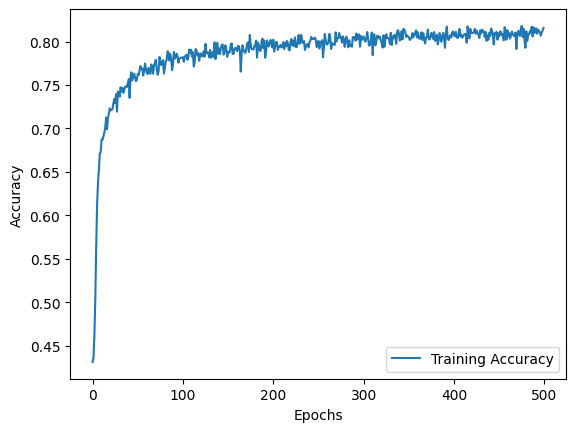

In [53]:
# Plot training history
plt.plot(histories[best_index].history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

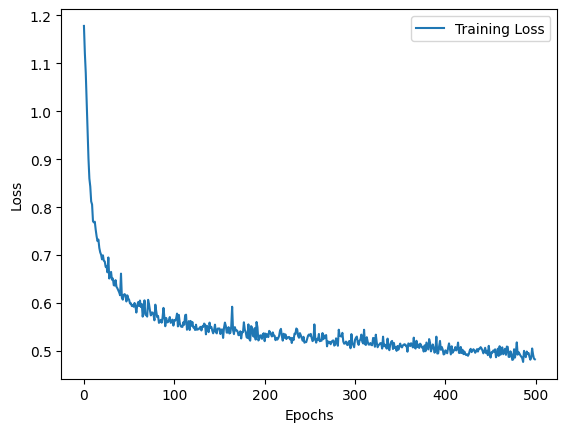

In [54]:
plt.plot(histories[best_index].history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_ints[best_index])
print(cm)

[[205  45  28]
 [ 22 101  49]
 [ 12  50 373]]


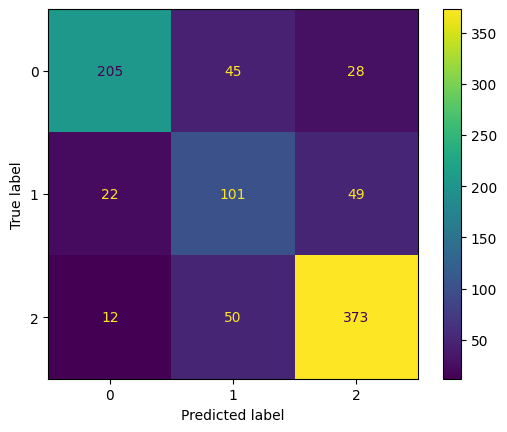

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Multiple Training-Testing Processes for Balanced Data Using Best Set of Parameters from Grid Search

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical

In [29]:
# Best: 0.836192 using {'batch_size': 64, 'epochs': 500, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.25, 'model__neurons': 128}

In [31]:
num_of_experiments = 10

histories = []
losses = []
accuracies = []
y_preds = []
y_pred_ints = []
metrics_list = []


for i in range(10):
    model = Sequential()
    model.add(Dense(128, input_shape=(247,), activation='sigmoid'))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='sigmoid'))
    model.add(Dropout(0.25))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train_smote, y_train_smote, epochs=500, batch_size=64)
    histories.append(history)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_encoded, y_test)
    losses.append(loss)
    accuracies.append(accuracy)

    y_pred = model.predict(X_test_encoded)
    y_preds.append(y_pred)

    # for pred in y_pred:
    #     max_class_index = np.argmax(pred)
    #     for i in range(3):
    #         if i != max_class_index:
    #             pred[i] = 0
    #         else:
    #             pred[i] = 1
    
    y_pred_int = np.argmax(y_pred, axis=-1)
    y_pred_ints.append(y_pred_int)

    report = classification_report(y_test, y_pred_int, digits=6, output_dict=True)
    
    macro_f1_score_report = report.get('macro avg').get('f1-score')
    dropout_f1_score = report.get('0').get('f1-score')
    late_f1_score = report.get('1').get('f1-score')
    timely_f1_score = report.get('2').get('f1-score')
    accuracy = report.get('accuracy')

    metrics = {'Macro F1 Score': macro_f1_score_report, 'Dropout F1 Score': dropout_f1_score, 'Late F1 Score': late_f1_score,
               'Timely F1 Score': timely_f1_score, 'Accuracy': accuracy}
    metrics_list.append(metrics)
    
best_balanced_reports = pd.DataFrame(metrics_list, columns=['Macro F1 Score', 'Dropout F1 Score', 'Late F1 Score', 'Timely F1 Score', 'Accuracy'])
best_balanced_reports


Epoch 1/500


C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3434 - loss: 1.1647
Epoch 2/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3663 - loss: 1.1095
Epoch 3/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4260 - loss: 1.0604
Epoch 4/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5139 - loss: 0.9768
Epoch 5/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5724 - loss: 0.9038
Epoch 6/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5751 - loss: 0.8827
Epoch 7/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6029 - loss: 0.8499
Epoch 8/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6265 - loss: 0.8128
Epoch 9/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6187 - loss: 0.8186
Epoch 10/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6451 - loss: 0.8003
Epoch 11/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6635 - loss: 0.7610
Epoch 12/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6637 - lo

C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3323 - loss: 1.1870
Epoch 2/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3565 - loss: 1.1231
Epoch 3/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4157 - loss: 1.0615
Epoch 4/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4920 - loss: 0.9803
Epoch 5/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5766 - loss: 0.8920
Epoch 6/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6095 - loss: 0.8411
Epoch 7/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6213 - loss: 0.8306
Epoch 8/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6309 - loss: 0.8079
Epoch 9/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6425 - loss: 0.8047
Epoch 10/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6451 - loss: 0.7691
Epoch 11/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6621 - loss: 0.7502
Epoch 12/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6660 - lo

C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3267 - loss: 1.1753
Epoch 2/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3784 - loss: 1.1047
Epoch 3/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4778 - loss: 1.0210
Epoch 4/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5257 - loss: 0.9502
Epoch 5/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5632 - loss: 0.8966
Epoch 6/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5859 - loss: 0.8595
Epoch 7/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6193 - loss: 0.8254
Epoch 8/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6336 - loss: 0.7999
Epoch 9/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6365 - loss: 0.7895
Epoch 10/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6415 - loss: 0.7953
Epoch 11/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6482 - loss: 0.7693
Epoch 12/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6689 - lo

C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3262 - loss: 1.1911
Epoch 2/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3503 - loss: 1.1293
Epoch 3/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4473 - loss: 1.0491
Epoch 4/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5073 - loss: 0.9763
Epoch 5/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5623 - loss: 0.9069
Epoch 6/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5896 - loss: 0.8718
Epoch 7/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6020 - loss: 0.8454
Epoch 8/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6180 - loss: 0.8220
Epoch 9/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6116 - loss: 0.8401
Epoch 10/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6451 - loss: 0.7779
Epoch 11/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6552 - loss: 0.7752
Epoch 12/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6482 - lo

C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3393 - loss: 1.2165
Epoch 2/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3834 - loss: 1.1045
Epoch 3/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4558 - loss: 1.0422
Epoch 4/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5036 - loss: 0.9769
Epoch 5/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5469 - loss: 0.9161
Epoch 6/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5907 - loss: 0.8623
Epoch 7/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6008 - loss: 0.8556
Epoch 8/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6297 - loss: 0.8029
Epoch 9/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6476 - loss: 0.7981
Epoch 10/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6633 - loss: 0.7687
Epoch 11/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6568 - loss: 0.7776
Epoch 12/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6624 - lo

C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3366 - loss: 1.1504
Epoch 2/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3764 - loss: 1.1036
Epoch 3/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4480 - loss: 1.0385
Epoch 4/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5203 - loss: 0.9688
Epoch 5/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5603 - loss: 0.8997
Epoch 6/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5816 - loss: 0.8704
Epoch 7/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6203 - loss: 0.8190
Epoch 8/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6357 - loss: 0.8153
Epoch 9/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6283 - loss: 0.7981
Epoch 10/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6555 - loss: 0.7785
Epoch 11/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6528 - loss: 0.7599
Epoch 12/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6583 - lo

C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3296 - loss: 1.1581
Epoch 2/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3791 - loss: 1.0967
Epoch 3/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4263 - loss: 1.0533
Epoch 4/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5137 - loss: 0.9705
Epoch 5/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5665 - loss: 0.8983
Epoch 6/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5743 - loss: 0.8818
Epoch 7/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6126 - loss: 0.8378
Epoch 8/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6082 - loss: 0.8401
Epoch 9/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6369 - loss: 0.7972
Epoch 10/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6233 - loss: 0.8102
Epoch 11/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6469 - loss: 0.7702
Epoch 12/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6648 - lo

C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3496 - loss: 1.1607
Epoch 2/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3788 - loss: 1.1086
Epoch 3/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4632 - loss: 1.0344
Epoch 4/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5137 - loss: 0.9642
Epoch 5/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5657 - loss: 0.9025
Epoch 6/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6128 - loss: 0.8430
Epoch 7/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6023 - loss: 0.8465
Epoch 8/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6339 - loss: 0.8063
Epoch 9/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6243 - loss: 0.8045
Epoch 10/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6572 - loss: 0.7797
Epoch 11/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - loss: 0.7609
Epoch 12/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6623 - lo

C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3367 - loss: 1.1723
Epoch 2/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3814 - loss: 1.1013
Epoch 3/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4465 - loss: 1.0433
Epoch 4/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5214 - loss: 0.9645
Epoch 5/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5820 - loss: 0.8852
Epoch 6/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5939 - loss: 0.8581
Epoch 7/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6224 - loss: 0.8314
Epoch 8/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6405 - loss: 0.7919
Epoch 9/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6501 - loss: 0.7842
Epoch 10/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6603 - loss: 0.7780
Epoch 11/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6397 - loss: 0.7864
Epoch 12/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6753 - lo

C:\tugas_akhir_fl\flenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3355 - loss: 1.2114
Epoch 2/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3550 - loss: 1.1164
Epoch 3/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4363 - loss: 1.0486
Epoch 4/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4970 - loss: 0.9741
Epoch 5/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5649 - loss: 0.9059
Epoch 6/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5959 - loss: 0.8621
Epoch 7/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6270 - loss: 0.8340
Epoch 8/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6403 - loss: 0.7949
Epoch 9/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6323 - loss: 0.7969
Epoch 10/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6605 - loss: 0.7616
Epoch 11/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6643 - loss: 0.7568
Epoch 12/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6592 - lo

Macro F1 Score  Dropout F1 Score  Late F1 Score  Timely F1 Score  Accuracy
0        0.660200          0.747856       0.408946         0.823799  0.725424
1        0.686797          0.739372       0.488636         0.832383  0.735593
2        0.682776          0.750449       0.466019         0.831858  0.742373
3        0.683515          0.745826       0.466216         0.838503  0.748023
4        0.675351          0.736842       0.457143         0.832069  0.736723
5        0.694127          0.752294       0.489028         0.841060  0.750282
6        0.674324          0.732342       0.459119         0.831510  0.734463
7        0.663772          0.741410       0.410774         0.839130  0.736723
8        0.686987          0.757856       0.475904         0.827202  0.740113
9        0.676894          0.728938       0.476744         0.825000  0.727684

In [32]:
best_balanced_reports

Macro F1 Score  Dropout F1 Score  Late F1 Score  Timely F1 Score  Accuracy
0        0.660200          0.747856       0.408946         0.823799  0.725424
1        0.686797          0.739372       0.488636         0.832383  0.735593
2        0.682776          0.750449       0.466019         0.831858  0.742373
3        0.683515          0.745826       0.466216         0.838503  0.748023
4        0.675351          0.736842       0.457143         0.832069  0.736723
5        0.694127          0.752294       0.489028         0.841060  0.750282
6        0.674324          0.732342       0.459119         0.831510  0.734463
7        0.663772          0.741410       0.410774         0.839130  0.736723
8        0.686987          0.757856       0.475904         0.827202  0.740113
9        0.676894          0.728938       0.476744         0.825000  0.727684

In [33]:
average = best_balanced_reports.mean()
print(average)
std_deviation = best_balanced_reports.std()
print(std_deviation)

Macro F1 Score      0.678474
Dropout F1 Score    0.743318
Late F1 Score       0.459853
Timely F1 Score     0.832251
Accuracy            0.737740
dtype: float64
Macro F1 Score      0.010595
Dropout F1 Score    0.009178
Late F1 Score       0.028498
Timely F1 Score     0.005909
Accuracy            0.007891
dtype: float64


In [34]:
best_index = np.argmax(best_balanced_reports['Macro F1 Score'].values)
best_index

5

In [36]:
best_balanced_reports['Macro F1 Score'].loc[best_index]

0.6941271312656007

In [46]:
losses

[1.450320839881897,
 1.607086420059204,
 1.5691372156143188,
 1.6514710187911987,
 1.5399712324142456,
 1.476999044418335,
 1.4533348083496094,
 1.5658777952194214,
 1.5741478204727173,
 1.4788521528244019]

In [37]:
losses[best_index]

1.476999044418335

In [38]:
accuracies

[0.7254237532615662,
 0.7355931997299194,
 0.7423728704452515,
 0.7480226159095764,
 0.7367231845855713,
 0.7502824664115906,
 0.7344632744789124,
 0.7367231845855713,
 0.7401130199432373,
 0.7276836037635803]

In [39]:
y_pred_ints[best_index]

array([2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2,
       0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2,
       2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 0, 2,
       1, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 1, 2, 0, 1, 2, 1,
       0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1,
       1, 0, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2,
       2, 1, 0, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1,
       1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1,
       2, 0, 2, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2,
       0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2,

In [40]:
y_preds[best_index]

array([[5.9390208e-04, 6.3203581e-05, 9.9934286e-01],
       [3.0164477e-07, 3.3838316e-03, 9.9661583e-01],
       [9.2679658e-04, 6.0599815e-04, 9.9846727e-01],
       ...,
       [4.0424778e-03, 8.9553901e-04, 9.9506193e-01],
       [4.9041662e-01, 8.2028285e-04, 5.0876313e-01],
       [9.9532557e-01, 4.6744668e-03, 1.5026362e-09]], dtype=float32)

In [41]:
print(classification_report(y_test, y_pred_ints[best_index], digits=6))

              precision    recall  f1-score   support

           0   0.767790  0.737410  0.752294       278
           1   0.530612  0.453488  0.489028       172
           2   0.808917  0.875862  0.841060       435

    accuracy                       0.750282       885
   macro avg   0.702440  0.688920  0.694127       885
weighted avg   0.741910  0.750282  0.744759       885



In [42]:
histories[best_index].history

{'accuracy': [0.331454336643219,
  0.3930853009223938,
  0.46523863077163696,
  0.534573495388031,
  0.567080020904541,
  0.5875610709190369,
  0.6155580878257751,
  0.63059002161026,
  0.6373543739318848,
  0.6561443209648132,
  0.6632844805717468,
  0.6657271981239319,
  0.6677940487861633,
  0.6865839958190918,
  0.6860203146934509,
  0.6871476769447327,
  0.6991732716560364,
  0.7036828398704529,
  0.6933483481407166,
  0.7044343948364258,
  0.7025554180145264,
  0.7166478633880615,
  0.70969557762146,
  0.7085682153701782,
  0.715144693851471,
  0.720781683921814,
  0.715332567691803,
  0.7117624878883362,
  0.7262307405471802,
  0.7260428667068481,
  0.7215332388877869,
  0.7292371392250061,
  0.7275460362434387,
  0.7303645014762878,
  0.7361894249916077,
  0.732243537902832,
  0.7388200163841248,
  0.7275460362434387,
  0.7433295845985413,
  0.7358136177062988,
  0.7431416511535645,
  0.7403231859207153,
  0.7425779700279236,
  0.7427659034729004,
  0.7508455514907837,
  0.7480

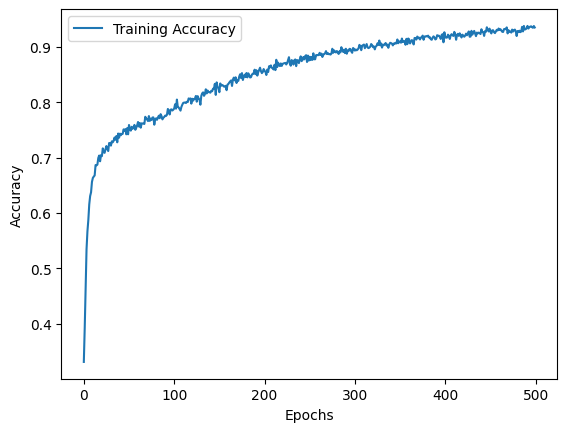

In [43]:
# Plot training history
plt.plot(histories[best_index].history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

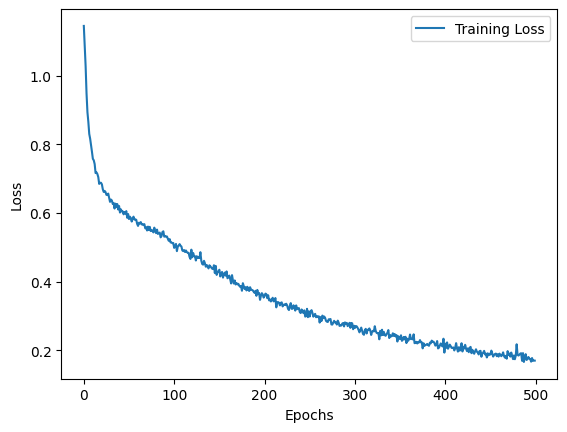

In [44]:
plt.plot(histories[best_index].history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_ints[best_index])
print(cm)

[[205  35  38]
 [ 42  78  52]
 [ 20  34 381]]


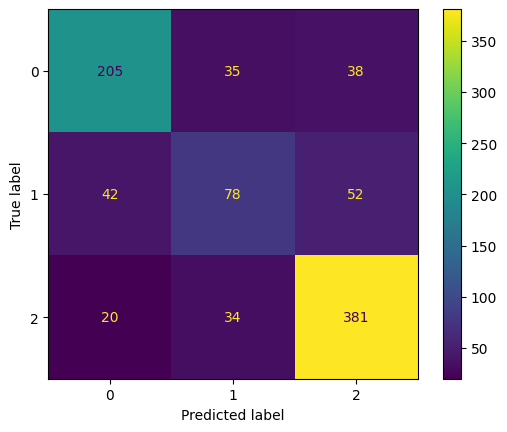

In [48]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()